In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/Malware Detection.csv", index_col=0)
df.head()

,callbacks_num,dlls_dlllist_unique_paths_num,dlls_ldrmodules_num,dlls_ldrmodules_unique_mappedpaths_num,dlls_ldrmodules_InInit_false_num,dlls_ldrmodules_InLoad_false_num,dlls_ldrmodules_InMem_false_num,dlls_ldrmodules_all_false_num,modules_num,processes_privs_enabled_not_default_num,processes_psxview_exited_num,processes_psxview_false_columns_num,processes_psxview_false_rows_num,processes_psxview_num,processes_psxview_okay_rows_num,processes_psxview_pslist_true_num,processes_psxview_psscan_true_num,services_svcscan_num,services_svcscan_running_num,services_svcscan_stopped_num,handles_num,mutex_mutantscan_num,threads_thrdscan_num,Malware or not,Name or Type
0,40,1037,3093,811,135,79,79,79,152,15,2,6,60,60,0,56,58,510,153,357,18028,108,988,0,Baseline
1,40,962,2837,752,121,70,70,70,152,13,2,6,55,55,0,51,53,510,145,365,18028,109,915,0,Baseline
2,40,967,2913,752,128,76,76,76,152,13,2,6,55,55,0,52,54,510,145,365,18028,108,791,0,Baseline
3,40,956,2865,741,126,75,75,75,152,13,2,6,54,54,0,51,53,510,145,365,18028,79,763,0,Baseline
4,40,954,2863,739,126,75,75,75,152,13,2,6,54,54,0,51,53,510,144,366,18028,79,767,0,Baseline


In [ ]:
df.isnull().sum()

callbacks_num                              0
dlls_dlllist_unique_paths_num              0
dlls_ldrmodules_num                        0
dlls_ldrmodules_unique_mappedpaths_num     0
dlls_ldrmodules_InInit_false_num           0
dlls_ldrmodules_InLoad_false_num           0
dlls_ldrmodules_InMem_false_num            0
dlls_ldrmodules_all_false_num              0
modules_num                                0
processes_privs_enabled_not_default_num    0
processes_psxview_exited_num               0
processes_psxview_false_columns_num        0
processes_psxview_false_rows_num           0
processes_psxview_num                      0
processes_psxview_okay_rows_num            0
processes_psxview_pslist_true_num          0
processes_psxview_psscan_true_num          0
services_svcscan_num                       0
services_svcscan_running_num               0
services_svcscan_stopped_num               0
handles_num                                0
mutex_mutantscan_num                       0
threads_th

In [ ]:
df.drop('Name or Type',axis='columns', inplace=True)

In [ ]:
df.head()

,callbacks_num,dlls_dlllist_unique_paths_num,dlls_ldrmodules_num,dlls_ldrmodules_unique_mappedpaths_num,dlls_ldrmodules_InInit_false_num,dlls_ldrmodules_InLoad_false_num,dlls_ldrmodules_InMem_false_num,dlls_ldrmodules_all_false_num,modules_num,processes_privs_enabled_not_default_num,processes_psxview_exited_num,processes_psxview_false_columns_num,processes_psxview_false_rows_num,processes_psxview_num,processes_psxview_okay_rows_num,processes_psxview_pslist_true_num,processes_psxview_psscan_true_num,services_svcscan_num,services_svcscan_running_num,services_svcscan_stopped_num,handles_num,mutex_mutantscan_num,threads_thrdscan_num,Malware or not
0,40,1037,3093,811,135,79,79,79,152,15,2,6,60,60,0,56,58,510,153,357,18028,108,988,0
1,40,962,2837,752,121,70,70,70,152,13,2,6,55,55,0,51,53,510,145,365,18028,109,915,0
2,40,967,2913,752,128,76,76,76,152,13,2,6,55,55,0,52,54,510,145,365,18028,108,791,0
3,40,956,2865,741,126,75,75,75,152,13,2,6,54,54,0,51,53,510,145,365,18028,79,763,0
4,40,954,2863,739,126,75,75,75,152,13,2,6,54,54,0,51,53,510,144,366,18028,79,767,0


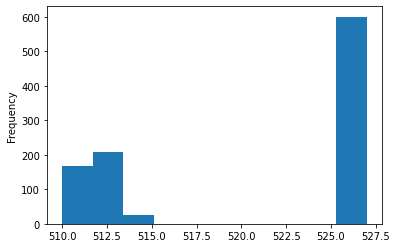

In [ ]:
df["services_svcscan_num"].plot.hist()

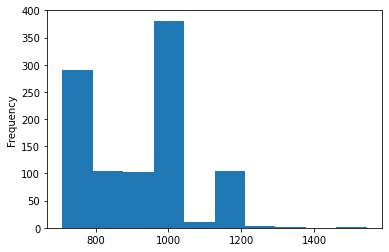

In [ ]:
df["threads_thrdscan_num"].plot.hist()

Highest number of threads that were open were 1000 threads.

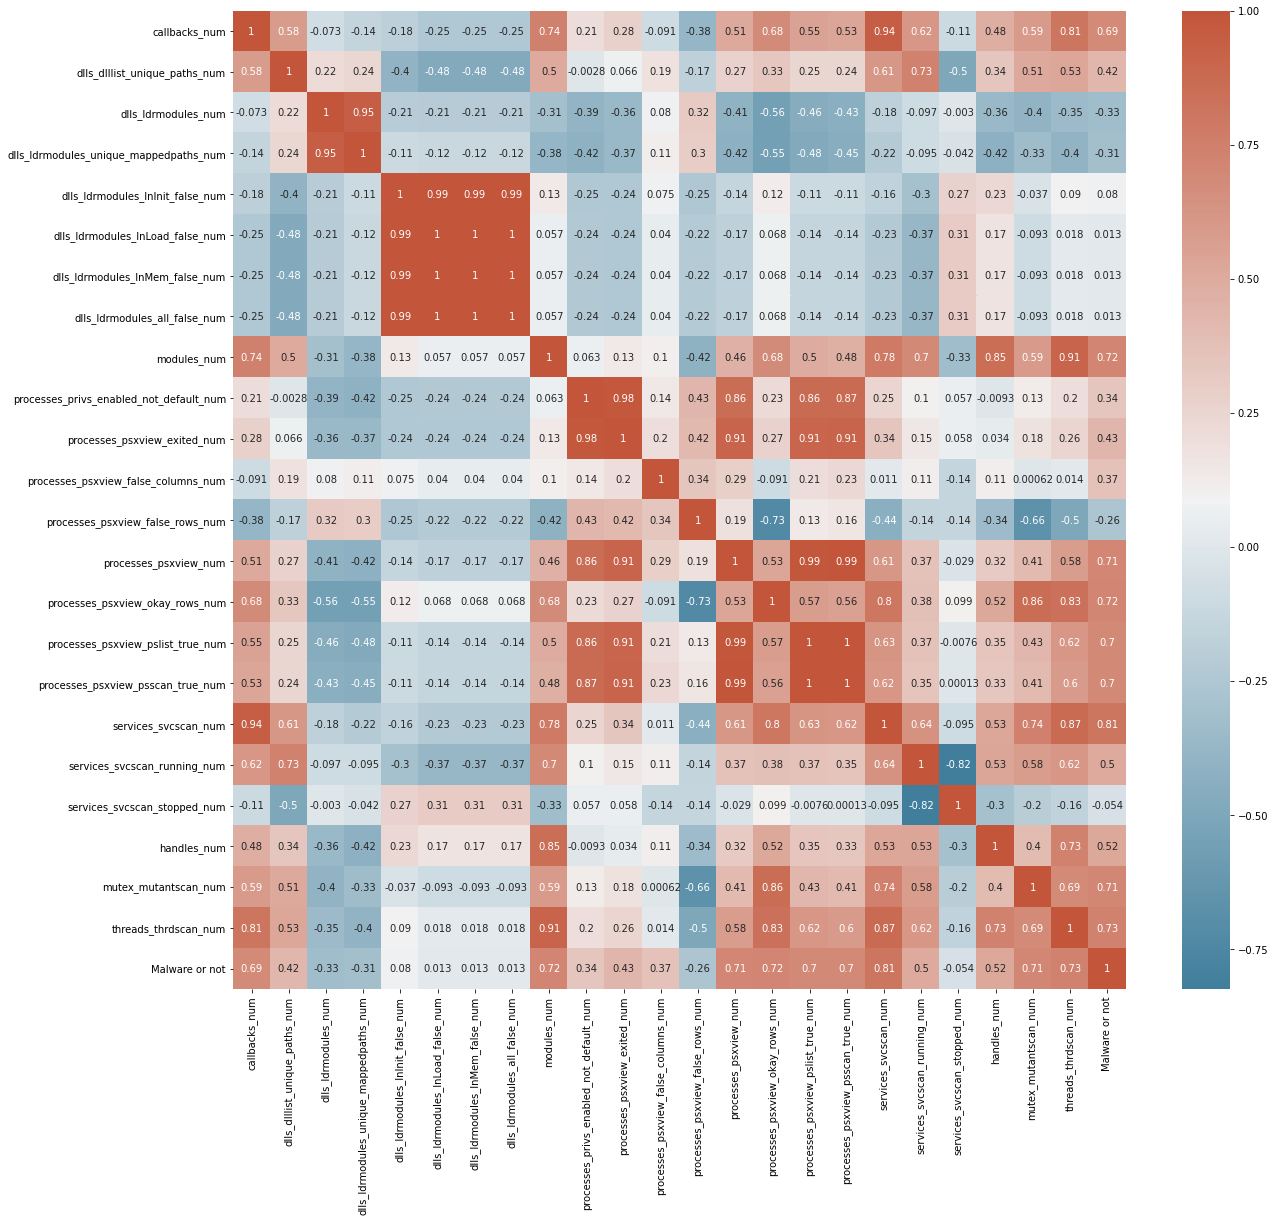

In [ ]:
corr = df.corr()

f, ax = plt.subplots(figsize=(20, 18))

cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, annot=True,  cmap=cmap)

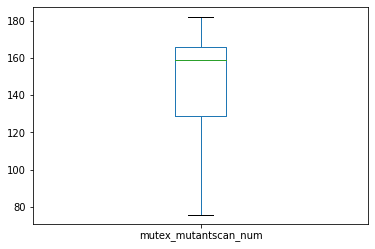

In [ ]:
df["mutex_mutantscan_num"].plot.box()

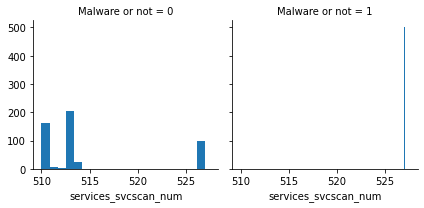

In [ ]:
grid = sns.FacetGrid(df, col="Malware or not")
grid.map(plt.hist, "services_svcscan_num",bins=20)


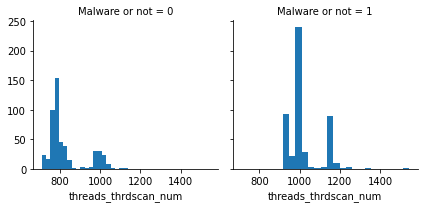

In [ ]:
grid = sns.FacetGrid(df, col="Malware or not")
grid.map(plt.hist, "threads_thrdscan_num",bins=20)


In [ ]:
df["Malware or not"].value_counts()

1    500
0    500
Name: Malware or not, dtype: int64

In [ ]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
x = df[['services_svcscan_num']]
y = df['Malware or not']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.89


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, x, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.45)
